<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/foodconsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url ='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
df = pd.read_csv(url)
df

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


In [3]:
df.isnull().sum()

,0
country,0
food_category,0
consumption,0
co2_emmission,0


In [4]:
#Checks the data to find out if there are any duplicates
df.duplicated().sum()

0

 **The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.**

In [5]:

import plotly.express as px



#Filter the dataset for the East African countries of interest
east_african_countries = ["Kenya", "Uganda", "Tanzania", "Rwanda", "Ethiopia"]
df_east_africa = df[df['country'].isin(east_african_countries)]

# Calculate the average CO₂ emissions per person by food category
average_emissions = df_east_africa.groupby('food_category')['co2_emmission'].mean().reset_index()

# Sort the categories by average CO₂ emissions in descending order
average_emissions = average_emissions.sort_values(by='co2_emmission', ascending=False)

# Plotting with Plotly (each food category will have a unique color)
fig = px.bar(
    average_emissions,
    x='co2_emmission',
    y='food_category',
    color='food_category',
    title="Average CO₂ Emissions per Person by Food Category in East Africa (Kenya, Uganda, Tanzania, Rwanda, Ethiopia)",
    labels={'co2_emmission': 'Average CO₂ Emissions (kg/person/year)', 'food_category': 'Food Category'}
)

# Customize layout for better readability
fig.update_layout(
    yaxis_title="",
    xaxis_title="CO₂ Emissions (kg/person/year)",
    plot_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),
    showlegend=False  # Hide legend if there are too many categories
)

# Show the plot
fig.show()


### The Average CO2 Emission Per Person by Food Category in East Africa  

This analysis explores the average CO2 emissions per person across five East African countries—Kenya, Uganda, Tanzania, Rwanda, and Ethiopia—categorized by food types. Key findings include:  

1. **Animal-Based Foods Dominate Emissions**: Meat categories such as **beef** and **lamb & goat** contribute the highest CO2 emissions per person, reflecting the environmental impact of livestock farming in the region.  
2. **Plant-Based Foods Have Lower Emissions**: Staples like **rice**, **wheat**, and **vegetables** show significantly lower emissions, supporting the notion that plant-based diets are more environmentally sustainable.  
3. **Milk and Dairy**: The region also reports moderate emissions from milk and dairy products, likely due to widespread livestock-rearing for both consumption and economic activity.  
4. **Regional Dietary Trends**: The findings are consistent with East Africa's dietary patterns, where plant-based staples dominate but meat consumption is growing due to urbanization and income growth.  

This data highlights the environmental implications of food choices and emphasizes the importance of sustainable agricultural practices to mitigate CO2 emissions in East Africa.

**Highlight the marked difference between consumption and emissions in certain food product of your choice**

In [6]:
import plotly.graph_objects as go



# Filter the dataset for Kenya and selected food categories
selected_country = "Kenya"
selected_foods = ["Beef", "Lamb & Goat", "Rice", "Fish", "Pork"]
df_kenya = df[(df['country'] == selected_country) & (df['food_category'].isin(selected_foods))]

#  Calculate the average consumption and CO₂ emissions for the selected food categories in Kenya
average_metrics = df_kenya.groupby('food_category')[['consumption', 'co2_emmission']].mean().reset_index()

# Sort the data by CO₂ emissions in descending order for plotting
average_metrics = average_metrics.sort_values(by='co2_emmission', ascending=False)

# Plotting both metrics with Plotly, highlighting each selected food category
fig = go.Figure()

# Add bar for CO₂ emissions
fig.add_trace(go.Bar(
    x=average_metrics['food_category'],
    y=average_metrics['co2_emmission'],
    name='CO₂ Emissions (kg/person/year)',
    marker_color='indianred'
))

# Add bar for consumption
fig.add_trace(go.Bar(
    x=average_metrics['food_category'],
    y=average_metrics['consumption'],
    name='Consumption (kg/person/year)',
    marker_color='lightseagreen'
))

# Add annotations for each selected food category to highlight the difference between consumption and emissions
for food in selected_foods:
    highlight_data = average_metrics[average_metrics['food_category'] == food]
    if not highlight_data.empty:
        fig.add_annotation(
            x=food,
            y=highlight_data['co2_emmission'].values[0],
            text=f"{food}: Higher emissions vs. consumption",
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40,
            font=dict(color="red"),
            bgcolor="lightyellow"
        )

# Customize layout
fig.update_layout(
    title="Comparison of Average Consumption and CO₂ Emissions for Selected Foods in Kenya",
    xaxis_title="Food Category",
    yaxis_title="Amount (kg/person/year)",
    barmode='group',
    plot_bgcolor="white"
)

# Show the plot
fig.show()


The data suggests that animal-based products (like beef and lamb) have a disproportionately high environmental cost relative to their consumption in Kenya. Even lower-consumption items, such as fish and pork, exhibit higher CO₂ emissions, underscoring the need for sustainable food production practices.

**The food consumption of animal and non-animal products and the impact on carbon footprint**

In [7]:

# Define lists for animal-based and plant-based foods
animal_based = ["Beef", "Pork", "Poultry", "Fish", "Lamb & Goat", "Milk (incl. cheese)", "Eggs"]
plant_based = ["Rice", "Wheat and Wheat Products", "Nuts (incl. peanut butter)", "Soybeans"]

#  Add a new column to categorize each food item as 'Animal' or 'Plant'
df['food_type'] = df['food_category'].apply(lambda x: 'Animal' if x in animal_based else 'Plant')

# Filter for Kenya (or other specific country if needed)
df_kenya = df[df['country'] == 'Kenya']

# Aggregate data by food type to get total consumption and emissions for each category
summary = df_kenya.groupby('food_type')[['consumption', 'co2_emmission']].sum().reset_index()

#  Plotting total consumption and CO₂ emissions by food type
fig = go.Figure()

# Add bar for CO₂ emissions
fig.add_trace(go.Bar(
    x=summary['food_type'],
    y=summary['co2_emmission'],
    name='Total CO₂ Emissions (kg/person/year)',
    marker_color='indianred'
))

# Add bar for consumption
fig.add_trace(go.Bar(
    x=summary['food_type'],
    y=summary['consumption'],
    name='Total Consumption (kg/person/year)',
    marker_color='lightseagreen'
))

# Step 9: Customize layout
fig.update_layout(
    title="Total Consumption and CO₂ Emissions of Animal vs. Plant-Based Foods in Kenya",
    xaxis_title="Food Type",
    yaxis_title="Amount (kg/person/year)",
    barmode='group',
    plot_bgcolor="white"
)

# Show the plot
fig.show()


The data highlights that animal-based food production is highly carbon-intensive, contributing significantly to emissions despite its relatively low consumption. In contrast, plant-based foods are both less emission-intensive and more sustainably consumed, emphasizing their environmental advantages.

***Beef's contribution to CO2 emissions (kg/person/year) ***

In [8]:
#Filter the data for the food category 'Beef'
df_beef = df[df['food_category'] == 'Beef']

# Calculate the average CO₂ emissions for Beef across all countries
average_beef_co2_emissions = df_beef['co2_emmission'].mean() if not df_beef.empty else 0

# Display the CO₂ emissions for Beef
print(f"Average CO₂ emissions from Beef across all countries: {average_beef_co2_emissions:.2f} kg/person/year")

# Create a simple bar chart to visualize Beef's average CO₂ emissions across all countries
fig = go.Figure(go.Bar(
    x=['Beef'],
    y=[average_beef_co2_emissions],
    marker_color='indianred',
    name='Average CO₂ Emissions (kg/person/year)'
))

fig.update_layout(
    title="Average CO₂ Emissions from Beef Across All Countries",
    xaxis_title="Food Category",
    yaxis_title="CO₂ Emissions (kg/person/year)",
    plot_bgcolor="white"
)

# Show the plot
fig.show()


Average CO₂ emissions from Beef across all countries: 374.10 kg/person/year


***A box plot and interpretation of the CO2 contributions of food levels. ***

In [ ]:
# Create the box plot
fig = px.box(
    df,
    x="food_category",
    y="co2_emmission",
    title="CO₂ Emissions by Food Category",
    labels={"co2_emmission": "CO₂ Emissions (kg CO₂eq)", "food_category": "Food Category"},
    color="food_category",
    points="outliers",  # Show only outliers on the boxplots
)

# Display the plot
fig.show()

**Top 10 Countries with highest emissions.**


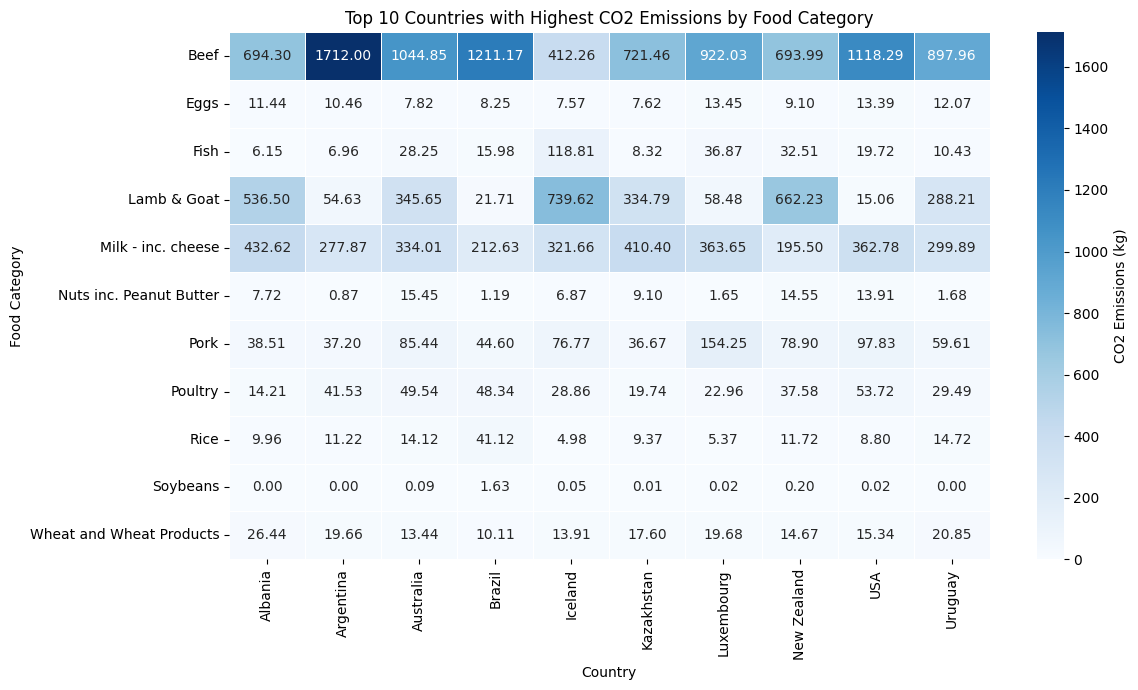

In [15]:
# Calculate total CO2 emissions per country and get the top 10 countries
top_countries = df.groupby('country')['co2_emmission'].sum().nlargest(10).index
filtered_data = df[df['country'].isin(top_countries)]

# Pivot the data to prepare for the heatmap
heatmap_data = filtered_data.pivot_table(index='food_category', columns='country', values='co2_emmission', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'CO2 Emissions (kg)'})
plt.title('Top 10 Countries with Highest CO2 Emissions by Food Category')
plt.xlabel('Country')
plt.ylabel('Food Category')
plt.tight_layout()
plt.show()

Livestock-based products, particularly beef, lamb, and dairy, are the largest contributors to CO₂ emissions across all countries.
Plant-based foods (e.g., soybeans, wheat) have a significantly lower carbon footprint, suggesting their potential for more sustainable consumption globally.

# **Conclusion**
The analysis reveals that **animal-based foods**, particularly beef and lamb, dominate CO₂ emissions in East Africa, reflecting the environmental cost of livestock farming. In contrast, **plant-based staples** like rice, wheat, and vegetables have significantly lower emissions, supporting their role in sustainable diets. Moderate emissions from **milk and dairy** further highlight the environmental impact of livestock-rearing. As urbanization and income growth drive increased meat consumption, the findings underscore the need for **sustainable agricultural practices** to mitigate emissions and promote environmentally friendly food systems in the region.